<h1> Pokemon Classification Model </h1>

---

<p> Let's start by importing the important stuff that we need. Next we download the data, build the data pipeline, train the model, and then hopefully deploy the model on my blog.</p>

---

In [78]:
from fastai.vision.all import *
from duckduckgo_search import ddg_images
from fastcore.all import *
import pandas as pd
pd.set_option('display.max_rows', 500)
import torch
device = torch.device('mps')
# torch.default_device(device)

In [15]:
# download data from 
def search_images(term, max_images=50): return L(ddg_images(term, max_results=max_images)).itemgot('image')
urls = search_images('fire pokemon', max_images=10)
urls[0]

/opt/homebrew/Caskroom/miniforge/base/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/opt/homebrew/Caskroom/miniforge/base/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/opt/homebrew/Caskroom/miniforge/base/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'https://staticg.sportskeeda.com/editor/2021/01/c1147-16113918941221-800.jpg'

Now let's build it to download a bunch of different Pokemon Types!

In [19]:
import os
df = pd.read_csv('data/pokemon_df.csv')
df['Ndex'] = df['Ndex'].apply(lambda x: int(x[1:]))
# for i in range(0, len(df)):


# pokemon_types = [
#     "Normal", "Fire", "Water", "Electric", "Grass", "Ice", 
#     "Fighting", "Poison", "Ground", "Flying", "Psychic", 
#     "Bug", "Rock", "Ghost", "Dragon", "Dark", "Steel", "Fairy"
# ]

# path = Path('pokemon_type')
# from time import sleep

# for o in pokemon_types:
#     dest = (path/o)
#     dest.mkdir(exist_ok=True, parents=True)
#     download_images(dest, urls=search_images(f'{o} pokemon photo'))
#     sleep(5)
#     resize_images(path/o, max_size=400, dest=path/o)

In [37]:
path_images = Path('data/pictures/pokemon_1.png')

Path('data/pictures/pokemon_1.png')

In [41]:
Path(os.getcwd())

Path('/Users/benjaminzeisberg/university/fastai/lectures/lecture2')

In [49]:
os.rename('data/pictures/pokemon_1.png', 'pokemon_1.png')

FileNotFoundError: [Errno 2] No such file or directory: 'data/pictures/pokemon_1_grass.png' -> 'pokemon_1.png'

In [58]:
for type in df['Type'].unique():
    os.mkdir(f'data/pictures/{type}')

In [59]:
# Moving them in the correct folders
for i in range(1, len(df['Ndex'].unique())):
    frame = df.loc[df['Ndex'] == i]
    row = frame.iloc[0]
    type = row['Type']
    os.rename(f'data/pictures/pokemon_{i}.png', f'data/pictures/{type}/pokemon_{i}.png')

In [60]:
get_image_files(path='data/pictures/')

(#1010) [Path('data/pictures/Water/pokemon_535.png'),Path('data/pictures/Water/pokemon_119.png'),Path('data/pictures/Water/pokemon_657.png'),Path('data/pictures/Water/pokemon_131.png'),Path('data/pictures/Water/pokemon_656.png'),Path('data/pictures/Water/pokemon_130.png'),Path('data/pictures/Water/pokemon_118.png'),Path('data/pictures/Water/pokemon_278.png'),Path('data/pictures/Water/pokemon_536.png'),Path('data/pictures/Water/pokemon_913.png')...]

In [65]:
path = Path('data/pictures/')

Path('data/pictures')

In [64]:
pokemons = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [66]:
# now we need to tell our datablock where our items are
dls = pokemons.dataloaders(path)

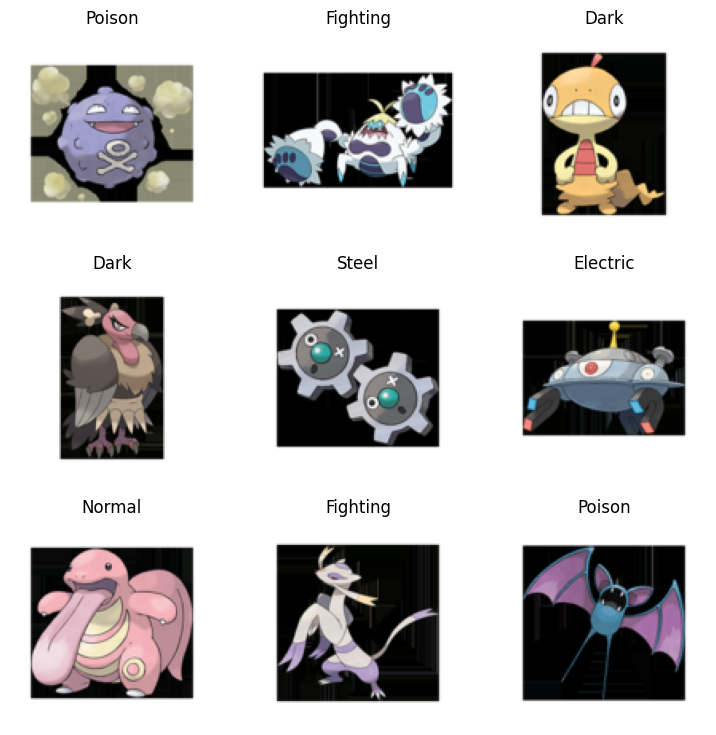

In [70]:
dls.valid.show_batch(max_n=9, nrows=3)

In [83]:
default_device()

device(type='mps')

In [86]:
# Data Augmenation

# This does not run on Mac M1 with MPS devices!

# pokemons = pokemons.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = pokemons.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)


In [89]:
# Train and learning
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(8)

/opt/homebrew/Caskroom/miniforge/base/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,4.255514,3.037972,0.841584,00:05


epoch,train_loss,valid_loss,error_rate,time
0,3.232000,2.865299,0.787129,00:07
1,2.717485,2.688650,0.732673,00:06
2,2.179033,2.699625,0.717822,00:06
3,1.707126,2.728021,0.688119,00:06
4,1.326017,2.723592,0.698020,00:06
5,1.036368,2.749372,0.693069,00:06
6,0.828428,2.756829,0.702970,00:06
7,0.679754,2.762048,0.707921,00:06


In [94]:
# Exporting the weights
learn.path = Path('.')
learn.export()

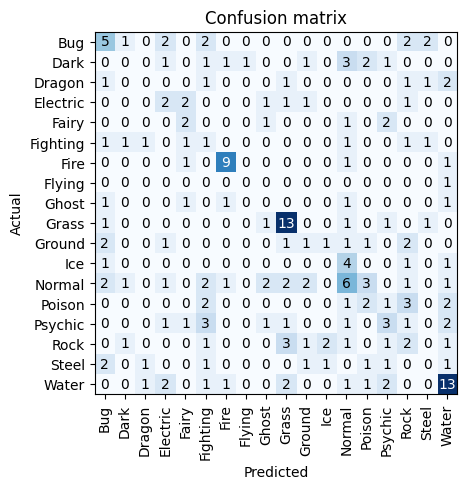

In [90]:
# Let's see the big Matrix

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

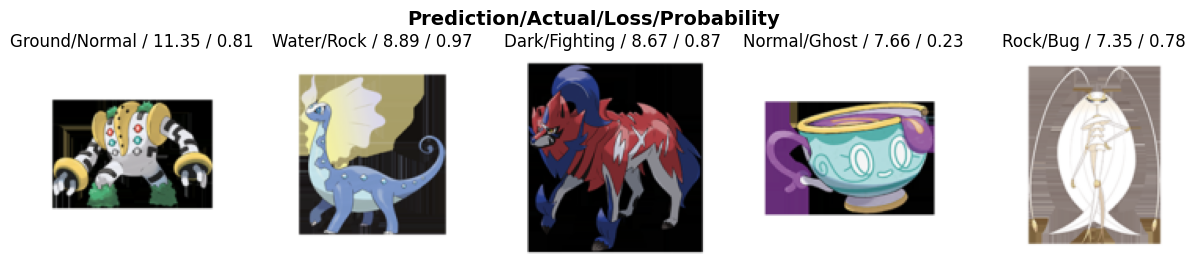

In [92]:
interp.plot_top_losses(5, nrows=1)

I mean these are tough. If I had never played pokemon before I could not predict what type they were.